In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
scripts_path = os.path.abspath(os.path.join('../scripts'))
if scripts_path not in sys.path:
    sys.path.insert(0,scripts_path)

In [3]:
from station_location import *

In [19]:
X_train = pd.read_csv('../processed-data/X_train.csv', index_col=0).values
X_test = pd.read_csv('../processed-data/X_test.csv', index_col=0).values
y_train = pd.read_csv('../processed-data/y_train.csv', index_col=0).values.reshape(-1,)
y_test = pd.read_csv('../processed-data/y_test.csv', index_col=0).values.reshape(-1,)

In [20]:
X_train.shape

(239259, 7)

In [21]:
y_train.shape

(239259,)

In [22]:
X_test.shape

(59815, 7)

In [23]:
y_test.shape

(59815,)

In [56]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [110]:
def show_accuracy(pred, true, set_):
    print(f"Predicted earthquakes: {pred[pred==1].shape[0]}")
    print(f"{set_} Accuracy: {accuracy_score(true, pred)}")
    print(f"{set_} Precision: {precision_score(true, pred)}")
    print(f"{set_} Recall: {recall_score(true, pred)}")
    print(f"{set_} F1 score: {f1_score(true, pred)}")

In [111]:
def predict(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    show_accuracy(pred_train, y_train, "Train")
    print("")
    show_accuracy(pred_test, y_test, "Test") 

In [74]:
rfc = RandomForestClassifier(n_estimators=50, class_weight={0: 0.000001, 1: 0.999999}, n_jobs=8)
rfc.fit(X_train, y_train)
predict(rfc)

 Predicted earthquakes: 1123
Train Accuracy: 0.99987879243832
Train Precision: 1.0
Train Recall: 0.9748263888888888
Train F1 score: 0.9872527472527473
 Predicted earthquakes: 8
Test Accuracy: 0.9941653431413525
Test Precision: 0.125
Test Recall: 0.0029154518950437317
Test F1 score: 0.005698005698005698


In [77]:
gbt = GradientBoostingClassifier(n_estimators=500)
gbt.fit(X_train, y_train)
predict(gbt)

 Predicted earthquakes: 611
Train Accuracy: 0.9973041766453926
Train Precision: 0.9148936170212766
Train Recall: 0.4852430555555556
Train F1 score: 0.6341463414634146

 Predicted earthquakes: 899
Test Accuracy: 0.979536905458497
Test Precision: 0.010011123470522803
Test Recall: 0.026239067055393587
Test F1 score: 0.014492753623188406


In [100]:
X_train.shape

(239259, 7)

In [104]:
X_2 = X_train[:, 5:7]
X_2.shape

(239259, 2)

In [105]:
X_2[:,1].min()

0.021363796398600001

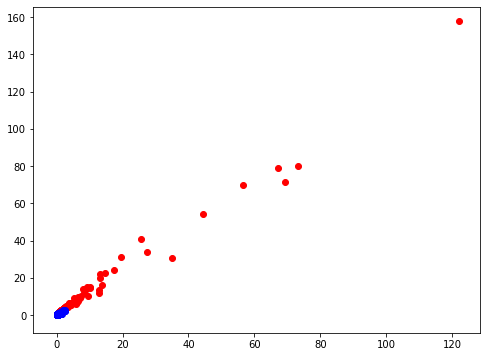

In [109]:
plt.figure(figsize=(8,6))

plt.scatter(X_2[y_train==1,0][:10000], X_2[y_train==1,1][:10000], c='red')
plt.scatter(X_2[y_train==0,0][:10000], X_2[y_train==0,1][:10000], c='blue')
#plt.ylim(-2, 2500)